In [8]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
# from torch.utils.tensorboard import SummaryWriter
import warnings

warnings.simplefilter("ignore")
test_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
model = torch.load('rotation_iterdrop49.pth', map_location=torch.device('cpu'))
from PIL import Image
classes = ['0', '180', '270', '90']
# classes = ['documents', 'personal']
def predict(model, test_image_name):

    transform = test_transform

    test_image = Image.open(test_image_name).convert('RGB')
    plt.imshow(test_image)

    test_image_tensor = transform(test_image)
#     print(test_image_tensor.size())

    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)

    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        _ , b = (torch.max(out,1))
#         print(out)
#         print(train_data_loader.dataset.classes[b.item()])
        ps = torch.exp(out)
        topk, topclass = ps.topk(1, dim=1)
#     print(ps)
#     print(topk,topclass)
    return classes[b.item()], topk.cpu().numpy()[0][0]



('0', np.float32(1.0))


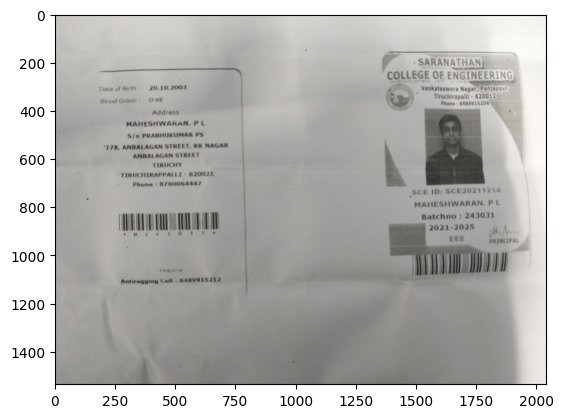

In [17]:
import os, shutil
img= "/home/sidharth/Documents/datasets/students_id/9hBPuZJAQH.jpg"
result=predict(model,img)
print(result)
import cv2 as cv
from scipy import ndimage


In [16]:
img=cv.imread(img)
rotated_90 = ndimage.rotate(img,-90,mode="nearest")
cv.imwrite(os.path.join("/home/sidharth/Documents/datasets/students_id/","9hBPuZJAQH.jpg"),rotated_90)

True

In [5]:
import os
import shutil
curr_path="/home/sidharth/Documents/datasets/students_id"
copy_coll_path="/home/sidharth/Documents/verify_id/app/result/college_id"
copy_pan_path="/home/sidharth/Documents/verify_id/app/result/pan"
copy_aadhar_path="/home/sidharth/Documents/verify_id/app/result/aadhar"
copy_personal_path="/home/sidharth/Documents/verify_id/app/result/personal"
count=0
per=0
for file in os.listdir(curr_path):
    count+=1
    
    if count<11440:
        continue
    print(file)
    result=predict(model,os.path.join(curr_path, file))
    
    
    """if result[0]=='college_id'and result[1]>=0.99:
        shutil.move(os.path.join(curr_path, file), os.path.join(copy_coll_path, file))
    elif result[0]=='aadhar' and result[1]>=0.90:
        shutil.move(os.path.join(curr_path, file),os.path.join(copy_aadhar_path, file))
    elif result[0]=='pancard'and result[1]>=0.90:
        shutil.move(os.path.join(curr_path, file),os.path.join(copy_pan_path, file))"""
    if result[0]=='personal_photo' and result[1]>=0.90:
        per+=1
        shutil.copy(os.path.join(curr_path, file),os.path.join(copy_personal_path, file))     
    print(count, per)    

        

5Gk89pYb7C.jpg
11440 1
oYAHoX2OV8.jpeg
11441 1
htdWWvQMpZ.jpg
11442 1
rEjrVlzCw8.jpeg
11443 1
CPiISaABr8.jpeg
11444 1
zc71jkEDfD.png
11445 2
V8PL7GoKs8.jpg
11446 3
vXsTtscvY9.png
11447 3
NNIvgLmRys.jpg
11448 3
3H1gmj77mL.jpg
11449 3
JM8Faog3NE.jpg
11450 3
7V9YfkzB1Q.jpg
11451 4
YCMwT0XZ7X.jpg
11452 4
22XbohABXD.jpg
11453 4
s7cSQ4VTQN.jpeg
11454 4
xREOlqac8n.jpg
11455 4
T64iLZsTUC.jpg
11456 5
lrVgYjCwrW.jpg
11457 5
hBxft1JYIa.jpg
11458 5
qSmOPcXwWP.jpg
11459 6
YvcRiC8OxN.png
11460 6
lrX0wMISC8.jpg
11461 6
iNASrYX1YU.jpeg
11462 6
Q5jrEmdZBG.jpg
11463 6
uHDTDtnOCV.jpeg
11464 6
mkR3HWiMmg.jpg
11465 7
bTcfK5yxex.jpg
11466 8
gSauEl1Jnx.jpg
11467 8
KaYsoVT1B9.jpg
11468 8
cJtVCJsPB6.jpg
11469 8
GtpTMtw64Y.jpg
11470 8
bvKLWmcZJx.png
11471 8
QXM8T2F7dC.jpg
11472 8
zBA0eOrU7f.jpg
11473 8
HOlJp1NKis.jpg
11474 8
xy3Rsk54iP.jpg
11475 9
Fs4vN5zCP5.jpg
11476 10
U7qaiuMXbq.jpeg
11477 11
7K3j0SNcX7.jpeg
11478 12
TKTW5qYncD.jpg
11479 12
Rk8WAp71cX.jpg
11480 12
C7aHT59iIU.jpg
11481 13
9iVtfsJw4c.png
11482

('270', 0.98551047)


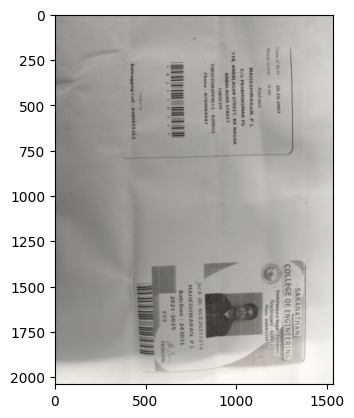

In [23]:
import os
import shutil
curr_path="/home/sidharth/Documents/datasets/students_id/"
result=predict(model,os.path.join(curr_path,"9hBPuZJAQH.jpg"))
print(result)
